# NatDev - EC Modeling

#### Importing Libraries

#### Important Changes
1. added PROPTYPE column to data
2. created feature 'tax_per_acre' to calculate tax amount per acre
3. removed 'Category_v_Anchor' column
4. removed 'land_use_name' feature
5. converted 'yr_blt' column to 'age' column

In [163]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_predict

## Load Data

In [164]:
# Load data
data_file_path = 'C:/Users/pranshuk/OneDrive - Logic20 20 Inc/Desktop/EC Prediction Data/New EC Data/data_w_geo_predictors_proj_level_kc.xlsx'
data = pd.read_excel(data_file_path)

In [165]:
data_file_path_2 = 'C:/Users/pranshuk/OneDrive - Logic20 20 Inc/Desktop/EC_Data_May_5/data_w_geo_predictors_proj_level.xlsx'
data2 = pd.read_excel(data_file_path)

In [166]:
#display rows
data.head()

,proj_cd,por_id,site_region_name,site_mkt_name,site_cty_name,site_county_name,site_addr_desc,site_type_desc,site_class_desc,Siterra_And_elemenT_Structure_Owner,...,awater,intptlat,intptlon,Universe_geometry_k,SITETYPE,LEVY_JURIS,PROPTYPE,KCA_ZONING,PREUSE_COD,PREUSE_DES
0,SE04035A - Site Modification (4902665),"POR0348914,POR0256248",WEST,SEATTLE WA,Renton,King,3401 Lind Avenue SW,Structure Non Building,Monopole,Crown Castle T3,...,4544405.0,47.479191,-122.194613,73e4ab58f0aed3fd,C9,RENTON,C,IL,195.0,Warehouse
1,SE01130C - Site Modification (4902594),POR0256260,WEST,SEATTLE WA,Seattle,King,9725 3rd Avenue NE,Building,Roof Top Mount,"US Wireless, Inc.",...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,C1,SEATTLE,C,SM-NG 145,106.0,Office Building
2,SE02108E - Site Modification (4946325),"POR0307721,POR0254995,POR0327285",WEST,SEATTLE WA,Seattle,King,3206 SW Admiral Way,Structure Non Building,Wood Pole,City of Seattle,...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,NaN,NaN,NaN,NaN,NaN,NaN
3,SE03559F - Site Modification (4902649),"POR0260721,POR0308045",WEST,SEATTLE WA,Tukwila,King,4030 S. 140th St,Structure Non Building,Wood Pole,City of Seattle,...,1069363.0,47.476289,-122.275740,9b2abbc615945874,R2,TUKWILA,C,HDR,11.0,Apartment
4,SE02339D - Site Modification (4902627),POR0256254,WEST,SEATTLE WA,Redmond,King,18609 NE 65th Street,Structure Non Building,Watertank,City of Redmond,...,1732419.0,47.677925,-122.115336,43129f32c57993d3,U1,REDMOND,C,MP,266.0,"Utility, Public"


In [167]:
data2.head()

,proj_cd,por_id,site_region_name,site_mkt_name,site_cty_name,site_county_name,site_addr_desc,site_type_desc,site_class_desc,Siterra_And_elemenT_Structure_Owner,...,awater,intptlat,intptlon,Universe_geometry_k,SITETYPE,LEVY_JURIS,PROPTYPE,KCA_ZONING,PREUSE_COD,PREUSE_DES
0,SE04035A - Site Modification (4902665),"POR0348914,POR0256248",WEST,SEATTLE WA,Renton,King,3401 Lind Avenue SW,Structure Non Building,Monopole,Crown Castle T3,...,4544405.0,47.479191,-122.194613,73e4ab58f0aed3fd,C9,RENTON,C,IL,195.0,Warehouse
1,SE01130C - Site Modification (4902594),POR0256260,WEST,SEATTLE WA,Seattle,King,9725 3rd Avenue NE,Building,Roof Top Mount,"US Wireless, Inc.",...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,C1,SEATTLE,C,SM-NG 145,106.0,Office Building
2,SE02108E - Site Modification (4946325),"POR0307721,POR0254995,POR0327285",WEST,SEATTLE WA,Seattle,King,3206 SW Admiral Way,Structure Non Building,Wood Pole,City of Seattle,...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,NaN,NaN,NaN,NaN,NaN,NaN
3,SE03559F - Site Modification (4902649),"POR0260721,POR0308045",WEST,SEATTLE WA,Tukwila,King,4030 S. 140th St,Structure Non Building,Wood Pole,City of Seattle,...,1069363.0,47.476289,-122.275740,9b2abbc615945874,R2,TUKWILA,C,HDR,11.0,Apartment
4,SE02339D - Site Modification (4902627),POR0256254,WEST,SEATTLE WA,Redmond,King,18609 NE 65th Street,Structure Non Building,Watertank,City of Redmond,...,1732419.0,47.677925,-122.115336,43129f32c57993d3,U1,REDMOND,C,MP,266.0,"Utility, Public"


In [168]:
data2['std_city'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
444    False
445    False
446    False
447    False
448    False
Name: std_city, Length: 449, dtype: bool

In [169]:
data2.columns.get_loc('name')

114

In [170]:
# data = data[data['EC Duration'] < 10]

In [171]:
data['Siterra_And_elemenT_Structure_Owner'] = data2['Siterra_And_elemenT_Structure_Owner']

In [172]:
data['por_plan_type_desc'] = data2['por_plan_type_desc']

In [173]:
data.columns

Index(['proj_cd', 'por_id', 'site_region_name', 'site_mkt_name',
       'site_cty_name', 'site_county_name', 'site_addr_desc', 'site_type_desc',
       'site_class_desc', 'Siterra_And_elemenT_Structure_Owner',
       ...
       'awater', 'intptlat', 'intptlon', 'Universe_geometry_k', 'SITETYPE',
       'LEVY_JURIS', 'PROPTYPE', 'KCA_ZONING', 'PREUSE_COD', 'PREUSE_DES'],
      dtype='object', length=133)

In [174]:
data2.columns

Index(['proj_cd', 'por_id', 'site_region_name', 'site_mkt_name',
       'site_cty_name', 'site_county_name', 'site_addr_desc', 'site_type_desc',
       'site_class_desc', 'Siterra_And_elemenT_Structure_Owner',
       ...
       'awater', 'intptlat', 'intptlon', 'Universe_geometry_k', 'SITETYPE',
       'LEVY_JURIS', 'PROPTYPE', 'KCA_ZONING', 'PREUSE_COD', 'PREUSE_DES'],
      dtype='object', length=133)

In [175]:
# data['special_infrastructure'] = data2['special_infrastructure']

In [176]:
# data2['special_infrastructure']

In [177]:
#data dimensions
data.shape

(449, 133)

In [178]:
data2.shape

(449, 133)

## Missing Data Analysis

In [179]:
#store column names
data_cols = data.columns

In [180]:
#storing columns with null values separately
isnull_cols = {}
for feature in data_cols:
    if data[feature].isnull().sum() > 0:
        isnull_cols[feature] = data[feature].isnull().sum()

In [181]:
#dictionary containing null counts 
isnull_cols

{'min_por_plan_status_dt': 40,
 'max_por_plan_status_dt': 40,
 'Min_HC_Release_POR': 25,
 'id': 60,
 'frm_apn': 60,
 'orig_apn': 60,
 'land_use': 60,
 'land_use_name': 65,
 'prop_ind': 60,
 'property_indicator_name': 60,
 'zoning': 60,
 'tax_yr': 61,
 'tax_amt': 61,
 'tot_val': 122,
 'imp_val': 160,
 'lan_val': 123,
 'imp_land_ratio': 161,
 'land_value_assessment_type': 60,
 'total_value_assessment_type': 60,
 'mkt_imp': 160,
 'mkt_lan': 123,
 'mkt_val': 122,
 'mkt_imp_land_ratio': 161,
 'assd_imp': 160,
 'assd_lan': 123,
 'assd_val': 122,
 'assd_imp_land_ratio': 161,
 'yr_blt': 152,
 'eff_yr_blt': 187,
 'bld_units': 96,
 'units_nbr': 378,
 'land_acres': 60,
 'land_sq_ft': 60,
 'bld_sq_ft': 164,
 'bldg_far': 164,
 'ubld_sq_ft': 153,
 'adj_sq_ft': 204,
 'bsmt_sq_ft': 430,
 'front_ft': 449,
 'depth_ft': 449,
 'gf_sq_ft': 409,
 'pool': 434,
 'energy_use_type': 449,
 'water_type': 73,
 'fuel_type': 449,
 'sewer_type': 449,
 'std_addr': 102,
 'std_state': 102,
 'std_zip': 102,
 'census_tr':

In [182]:
# calculating missing values percentage
percent_missing = data.isnull().sum() / len(data) * 100
percent_missing

proj_cd              0.000000
por_id               0.000000
site_region_name     0.000000
site_mkt_name        0.000000
site_cty_name        0.000000
                      ...    
LEVY_JURIS          19.153675
PROPTYPE            13.140312
KCA_ZONING          13.140312
PREUSE_COD          13.140312
PREUSE_DES          14.922049
Length: 133, dtype: float64

In [183]:
#checking datatypes
data.dtypes

proj_cd              object
por_id               object
site_region_name     object
site_mkt_name        object
site_cty_name        object
                     ...   
LEVY_JURIS           object
PROPTYPE             object
KCA_ZONING           object
PREUSE_COD          float64
PREUSE_DES           object
Length: 133, dtype: object

## Features of interest

In [184]:
#Final features for the dataset
#added PROPTYPE feature to the dataset
data_v1 = data[['site_type_desc','site_class_desc','MLA_Partner','MLA_Flag','isurban','EC Duration',
            'Category_v_Anchor','Category_v_L600','Category_v_Capacity_Other','max_proj_l600_flg','max_proj_2500_flg',
            'Min_SC_Release_POR','land_use_name','property_indicator_name','tax_amt','yr_blt','land_acres','std_city',
                'PROPTYPE']]

In [185]:
#removing columns
data_v1.drop(['Category_v_Anchor', 'land_use_name'], axis = 1, inplace = True)

#### Feature Engineering

In [186]:
#created tax_per_acre column
data_v1['tax_per_acre'] = data_v1['tax_amt']/data_v1['land_acres']

In [187]:
#dropping 'tax_amt' to use 'tax_per_acre' column instead
data_v1.drop('tax_amt', axis = 1, inplace = True)

In [188]:
#adding age column using yr_blt column
data_v1['age'] = 2022 - data_v1['yr_blt']

In [189]:
#dropping 'yr_blt' to use 'age' column instead
data_v1.drop('yr_blt', axis = 1, inplace = True)

In [190]:
data_v1

,site_type_desc,site_class_desc,MLA_Partner,MLA_Flag,isurban,EC Duration,Category_v_L600,Category_v_Capacity_Other,max_proj_l600_flg,max_proj_2500_flg,Min_SC_Release_POR,property_indicator_name,land_acres,std_city,PROPTYPE,tax_per_acre,age
0,Structure Non Building,Monopole,Other,Y,1,5.9,0,1,0,1,2020-04-01,WAREHOUSE,5.1496,RENTON,C,40035.461007,36.0
1,Building,Roof Top Mount,Other,N,1,8.8,0,0,0,1,2020-04-01,OFFICE BUILDING,3.2108,SEATTLE,C,80411.754080,43.0
2,Structure Non Building,Wood Pole,Other,N,1,12.7,1,1,1,1,2020-05-01,NaN,NaN,SEATTLE,NaN,NaN,NaN
3,Structure Non Building,Wood Pole,Other,N,1,10.6,1,0,1,1,2020-04-01,APARTMENT,0.3857,TUKWILA,C,14598.625875,NaN
4,Structure Non Building,Watertank,Other,N,1,4.6,0,0,0,1,2020-04-01,UTILITIES,0.8844,REDMOND,C,19.934419,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Structure Non Building,Utility Lattice Tower,Other,N,1,6.1,1,0,1,0,2021-08-01,MISCELLANEOUS,0.2415,RENTON,R,49.233954,NaN
445,Structure Non Building,Self Support Tower,Crown Castle,Y,0,8.6,0,0,0,1,2021-08-01,VACANT,49.2300,FALL CITY,R,5.750965,NaN
446,Building,Roof Top Mount,Other,N,1,5.1,0,1,0,1,2021-12-01,INDUSTRIAL,4.3243,BOTHELL,C,37266.223435,35.0
447,Building,In Building,Other,N,1,0.9,0,1,0,0,2022-01-01,PARKING,0.7920,BELLEVUE,C,28922.449495,NaN


In [191]:
data_v1.dtypes

site_type_desc                       object
site_class_desc                      object
MLA_Partner                          object
MLA_Flag                             object
isurban                               int64
EC Duration                         float64
Category_v_L600                       int64
Category_v_Capacity_Other             int64
max_proj_l600_flg                     int64
max_proj_2500_flg                     int64
Min_SC_Release_POR           datetime64[ns]
property_indicator_name              object
land_acres                          float64
std_city                             object
PROPTYPE                             object
tax_per_acre                        float64
age                                 float64
dtype: object

In [192]:
#dropping column due to high correlation with 'max_proj_l600_flg' 
data_v1.drop('Category_v_L600', axis = 1, inplace = True)

In [193]:
data_v1.head()

,site_type_desc,site_class_desc,MLA_Partner,MLA_Flag,isurban,EC Duration,Category_v_Capacity_Other,max_proj_l600_flg,max_proj_2500_flg,Min_SC_Release_POR,property_indicator_name,land_acres,std_city,PROPTYPE,tax_per_acre,age
0,Structure Non Building,Monopole,Other,Y,1,5.9,1,0,1,2020-04-01,WAREHOUSE,5.1496,RENTON,C,40035.461007,36.0
1,Building,Roof Top Mount,Other,N,1,8.8,0,0,1,2020-04-01,OFFICE BUILDING,3.2108,SEATTLE,C,80411.754080,43.0
2,Structure Non Building,Wood Pole,Other,N,1,12.7,1,1,1,2020-05-01,NaN,NaN,SEATTLE,NaN,NaN,NaN
3,Structure Non Building,Wood Pole,Other,N,1,10.6,0,1,1,2020-04-01,APARTMENT,0.3857,TUKWILA,C,14598.625875,NaN
4,Structure Non Building,Watertank,Other,N,1,4.6,0,0,1,2020-04-01,UTILITIES,0.8844,REDMOND,C,19.934419,NaN


In [194]:
data_v1['EC Duration'].dtype

dtype('float64')

In [195]:
#converting 'Min_SC_Release_POR' column to datetime format
data_v1['Min_SC_Release_POR'] = pd.to_datetime(data_v1['Min_SC_Release_POR'])

In [196]:
#storing 'month' from 'Min_SC_Release_POR' to a different column
data_v1['SC_month'] = data_v1['Min_SC_Release_POR'].dt.month

In [197]:
#storing 'year' from 'Min_SC_Release_POR' to a different column
data_v1['SC_year'] = data_v1['Min_SC_Release_POR'].dt.year

#### Subsetting COVID Outliers data

In [198]:
#data with COVID related EC Duration outliers in April 2020 
data_apr = data_v1[(data_v1['SC_month'] == 4) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [199]:
#data with COVID related EC Duration outliers in May 2020
data_may = data_v1[(data_v1['SC_month'] == 5) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [200]:
#data with COVID related EC Duration outliers in June 2020
data_june = data_v1[(data_v1['SC_month'] == 6) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [201]:
#data with COVID related EC Duration outliers in July 2020
data_july = data_v1[(data_v1['SC_month'] == 7) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [202]:
#data with COVID related EC Duration outliers in August 2020
data_august = data_v1[(data_v1['SC_month'] == 8) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [203]:
#data with COVID related EC Duration outliers in September 2020
data_sep = data_v1[(data_v1['SC_month'] == 9) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [204]:
#data with COVID related EC Duration outliers in October 2020
data_oct = data_v1[(data_v1['SC_month'] == 10) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [205]:
#data with COVID related EC Duration outliers in December 2020
data_dec = data_v1[(data_v1['SC_month'] == 12) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [206]:
#combining all of 2020 data
data_v3 = pd.concat([data_apr, data_may, data_june, data_july, data_august, data_sep, data_oct, data_dec])

In [207]:
#excluding 2020 COVID outlier data from main dataset
data_v1 = data_v1.drop(data_v3.index)

In [208]:
data_v1.shape

(378, 18)

In [209]:
#dropping a date column
data_v1.drop(['Min_SC_Release_POR','SC_month','SC_year'], axis = 1, inplace = True)

In [210]:
#separating categorical features in the dataset
categorical_features = [column_name for column_name in data_v1.columns if data_v1[column_name].dtype == 'O']
print('Number of categorical features: {}'.format(len(categorical_features)))
print('Categorical features: {}'.format(list(categorical_features)))

Number of categorical features: 7
Categorical features: ['site_type_desc', 'site_class_desc', 'MLA_Partner', 'MLA_Flag', 'property_indicator_name', 'std_city', 'PROPTYPE']


In [211]:
#Separating numerical features in the dataset
numerical_features = [column_name for column_name in data_v1.columns if data_v1[column_name].dtype != 'O']
print('Number of numerical features: {}'.format(len(numerical_features)))
print('Numerical Features:', list(numerical_features))

Number of numerical features: 8
Numerical Features: ['isurban', 'EC Duration', 'Category_v_Capacity_Other', 'max_proj_l600_flg', 'max_proj_2500_flg', 'land_acres', 'tax_per_acre', 'age']


#### Cardinality
Conclusions:
 - land_use_name, property_indicator_name, std_city are all high-cardinality, requiring reduction
 - site_class_desc should be considered for grouping

In [212]:
#checking cardinality
for each_feature in categorical_features:
    unique_values = len(data[each_feature].unique())
    print('{} : {}'.format(each_feature, unique_values))

site_type_desc : 2
site_class_desc : 14
MLA_Partner : 3
MLA_Flag : 2
property_indicator_name : 24
std_city : 36
PROPTYPE : 5


In [213]:
# data_v1['property_indicator_name'].mode()
data_v1['property_indicator_name'].value_counts()


SINGLE FAMILY RESIDENCE    49
APARTMENT                  48
OFFICE BUILDING            38
WAREHOUSE                  32
UTILITIES                  27
RETAIL                     20
VACANT                     18
AMUSEMENT-RECREATION       16
COMMERCIAL                 15
EXEMPT                     12
CONDOMINIUM                11
INDUSTRIAL                 10
SERVICE                     8
PARKING                     5
INDUSTRIAL LIGHT            5
MISCELLANEOUS               5
HOTEL, MOTEL                4
INDUSTRIAL HEAVY            3
DUPLEX                      2
TRANSPORT                   2
HOSPITAL                    1
COMMERCIAL CONDOMINIUM      1
AGRICULTURAL                1
Name: property_indicator_name, dtype: int64

### Sweetvis Report

In [214]:
# pip install sweetviz
# Importing Sweetviz for analysis
#import sweetviz as sv

In [215]:
#generating report around data 
#report = sv.analyze(source=data_v1,target_feat='EC Duration', pairwise_analysis='on')
#report.show_html('EC_v2_Analysis.html')

#### Missing Values
Conclusions:
The following fields should be considered for missing value replacement or interpolation:
 - land_use_name (categorical)
 - property_indicator_name (categorical)
 - tax_amt (numeric)
 - yr_blt (numeric)
 - land_acres (numeric)

In [216]:
#checking null values
data_v1.isnull().sum()

site_type_desc                 0
site_class_desc                0
MLA_Partner                    0
MLA_Flag                       0
isurban                        0
EC Duration                    0
Category_v_Capacity_Other      0
max_proj_l600_flg              0
max_proj_2500_flg              0
property_indicator_name       45
land_acres                    45
std_city                       0
PROPTYPE                      44
tax_per_acre                  46
age                          117
dtype: int64

## Outlier Identification
Conclusions:
tax_per_acre, age, and land_acres contain outliers that should be treated before missing value interpolation

<AxesSubplot:xlabel='land_acres'>

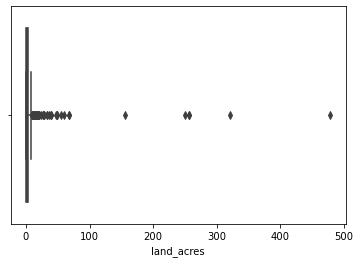

In [217]:
#using boxplot to visualize outliers
sns.boxplot(data_v1['land_acres'])

<AxesSubplot:xlabel='tax_per_acre'>

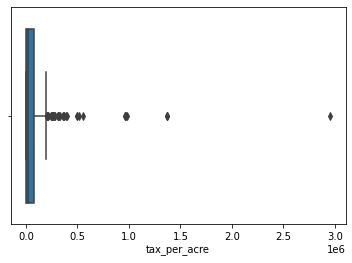

In [218]:
#using boxplot to visualize outliers
sns.boxplot(data_v1['tax_per_acre'])

<AxesSubplot:xlabel='age'>

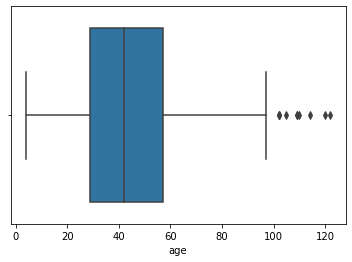

In [219]:
#using boxplot to visualize outliers
sns.boxplot(data_v1['age'])

In [220]:
#Outliers Treatment

features_with_outliers = ['land_acres', 'tax_per_acre', 'age']
for feature in features_with_outliers:
    q1 = data_v1[feature].quantile(.25)
    q3 = data_v1[feature].quantile(.75)
    IQR = q3 - q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    lower_outliers = data_v1.loc[data_v1[feature] < lower_limit, feature].count()
    upper_outliers = data_v1.loc[data_v1[feature] > upper_limit, feature].count()
    print(f"Treating {lower_outliers} lower ({lower_limit}) and {upper_outliers} upper ({upper_limit}) outliers for {feature}")
    data_v1.loc[data_v1[feature] < lower_limit, feature] = lower_limit
    data_v1.loc[data_v1[feature] > upper_limit, feature] = upper_limit

Treating 0 lower (-4.62755) and 47 upper (8.81445) outliers for land_acres
Treating 0 lower (-115809.39603281852) and 41 upper (198200.75723907538) outliers for tax_per_acre
Treating 0 lower (-13.0) and 10 upper (99.0) outliers for age


### Predicting Missing Values using Iterative Imputer / KNNImputer

**Multivariate feature imputation - Multivariate imputation by chained equations (MICE)**
A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value.

**K-Nearest Neighbor Imputation**
The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

In [221]:
# from sklearn.impute import KNNImputer
# train_knn = data_v1.copy(deep=True)

# knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
# train_knn['land_acres'] = knn_imputer.fit_transform(train_knn[['land_acres']])

In [222]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = data_v1.copy(deep=True)
mice_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=0), max_iter=20)
# mice_imputer = IterativeImputer()
train_mice['land_acres'] = mice_imputer.fit_transform(train_mice[['land_acres']])

In [223]:
train_mice.isnull().sum()

site_type_desc                 0
site_class_desc                0
MLA_Partner                    0
MLA_Flag                       0
isurban                        0
EC Duration                    0
Category_v_Capacity_Other      0
max_proj_l600_flg              0
max_proj_2500_flg              0
property_indicator_name       45
land_acres                     0
std_city                       0
PROPTYPE                      44
tax_per_acre                  46
age                          117
dtype: int64

In [224]:
# train_knn['tax_per_acre'] = knn_imputer.fit_transform(train_knn[['tax_per_acre']])
train_mice['tax_per_acre'] = mice_imputer.fit_transform(train_mice[['tax_per_acre']])

In [225]:
# train_knn['age'] = knn_imputer.fit_transform(train_knn[['age']])
train_mice['age'] = mice_imputer.fit_transform(train_mice[['age']])

In [226]:
train_mice.isnull().sum()

site_type_desc                0
site_class_desc               0
MLA_Partner                   0
MLA_Flag                      0
isurban                       0
EC Duration                   0
Category_v_Capacity_Other     0
max_proj_l600_flg             0
max_proj_2500_flg             0
property_indicator_name      45
land_acres                    0
std_city                      0
PROPTYPE                     44
tax_per_acre                  0
age                           0
dtype: int64

In [227]:
# train_knn.isnull().sum()

#### One-hot Encoding

In [228]:
# dummy_na parameter helps get separate column for null values, treating them as a separate feature
train_mice = pd.get_dummies(train_mice, dummy_na=True)

In [229]:
# dummy_na parameter helps get separate column for null values, treating them as a separate feature
# train_knn = pd.get_dummies(train_knn, dummy_na=True)

In [230]:
data_v1_oh = train_mice

In [231]:
# data_v1_oh = train_knn

#### Separating Target and Features

In [232]:
X = data_v1_oh.drop(['EC Duration'], axis = 1)
y = data_v1_oh['EC Duration']

# Model Training

#### Evaluating Model Performance

#### Feature Importance
We will be using ExtraTreesRegressor class for Feature Importance. This class implements a meta estimator that fits a number of randomized decision trees on various samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [233]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X, y)
etr_model.feature_importances_

array([7.54794344e-03, 1.84673166e-02, 3.86203385e-02, 2.36199826e-01,
       8.13962534e-02, 7.29431563e-02, 5.57661626e-02, 4.39575134e-03,
       4.01443682e-03, 0.00000000e+00, 1.31145637e-04, 3.71608206e-03,
       1.97752376e-02, 1.43599477e-02, 4.35793527e-03, 4.03261364e-03,
       3.79063458e-04, 5.09151908e-20, 1.36728168e-03, 5.01959530e-03,
       3.85931105e-03, 7.91181560e-04, 4.19612901e-03, 4.64345331e-03,
       0.00000000e+00, 2.72161416e-02, 2.72511370e-03, 2.12110562e-02,
       0.00000000e+00, 2.83157454e-03, 2.92970348e-02, 0.00000000e+00,
       2.94229228e-04, 6.02367020e-03, 1.84114294e-02, 8.42989466e-03,
       2.64668872e-03, 4.43926233e-03, 2.29115480e-03, 1.56733705e-03,
       6.97415680e-05, 9.09784078e-04, 2.56111908e-03, 2.08994512e-03,
       1.09637174e-03, 2.70445418e-03, 1.15326277e-02, 1.78261420e-03,
       1.42964797e-02, 7.62499369e-03, 1.79606124e-03, 2.86328019e-04,
       5.34916854e-03, 1.48208018e-03, 3.51104599e-02, 1.51775348e-02,
      

<AxesSubplot:>

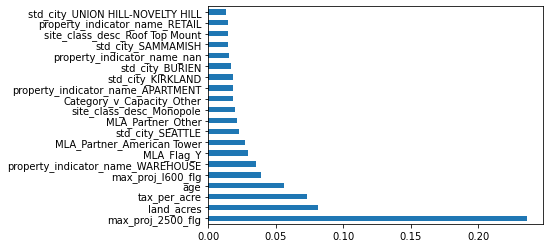

In [234]:
#Top 20 Important features
feature_imp = pd.Series(etr_model.feature_importances_, index = X.columns)
feature_imp.nlargest(20).plot(kind = 'barh')

#### Feature Scaling

In [235]:
#min-max scaling is a better option than Standard Scaler as the data is skewed and does ont follow a normal distribution
scaler_x = MinMaxScaler() #StandardScaler() #QuantileTransformer(output_distribution="uniform")

X_scaled = scaler_x.fit_transform(X)

#### Using Interaction terms in the linear model

In [236]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_scaled_poly = poly.fit_transform(X_scaled)

#### Model Design with target scaling

In [237]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer


def pass_func(x):
    return x
pass_transformer = FunctionTransformer(func=pass_func, inverse_func=pass_func)


pos_qt = QuantileTransformer(output_distribution="normal")
def qt_func(x):
    return max(qt.transform(x),0)
def qt_inv(x):
    return max(qt.inverse_transform(x), 0)
pos_qt_transformer = FunctionTransformer(func=pass_func, inverse_func=pass_func)

Cross-validation scores: [1.71100928 2.14325109 2.05189872 1.56457247 1.58573588 1.32791443
 1.784558   2.5512728  3.20077484 1.52838354]
Average cross-validation score: 1.9449371056962952


<AxesSubplot:xlabel='EC Duration'>

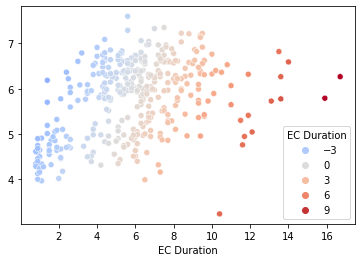

In [238]:
regr_trans = TransformedTargetRegressor(
    regressor=TweedieRegressor(link='log', power=2),
    #regressor=RidgeCV(),
    transformer=pass_transformer
    #transformer=MinMaxScaler()
    #transformer=PowerTransformer(method="box-cox")
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

Cross-validation scores: [1.71968955 1.91126715 1.72586098 1.2933501  1.71096826 1.82130191
 2.03174923 2.64068449 2.90705078 1.33861648]
Average cross-validation score: 1.9100538944651722


<AxesSubplot:xlabel='EC Duration'>

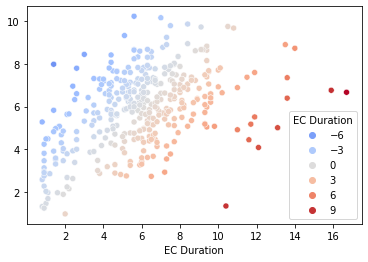

In [239]:
regr_trans = TransformedTargetRegressor(
    #regressor=TweedieRegressor(link='log', power=2),
    regressor=RidgeCV(),
    #transformer=pass_transformer
    #transformer=MinMaxScaler()
    transformer=PowerTransformer()
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

Cross-validation scores: [1.71020338 2.14089879 2.049707   1.56230817 1.5854552  1.32966219
 1.78635112 2.54999089 3.19847502 1.5280698 ]
Average cross-validation score: 1.944112156567267


<AxesSubplot:xlabel='EC Duration'>

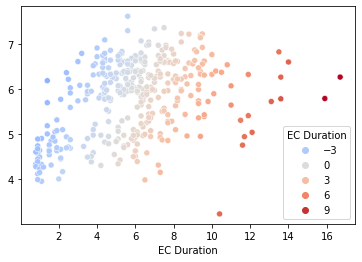

In [240]:
regr_trans = TransformedTargetRegressor(
    regressor=TweedieRegressor(link='log', power=1.99),
    #transformer=MinMaxScaler()
    #transformer=PowerTransformer()
    transformer=pos_qt_transformer
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

Cross-validation scores: [1.67451472 1.98801107 1.90333961 1.45570218 1.51768497 1.64611066
 1.83756066 2.38759459 2.92724018 1.251366  ]
Average cross-validation score: 1.85891246103214


<AxesSubplot:xlabel='EC Duration'>

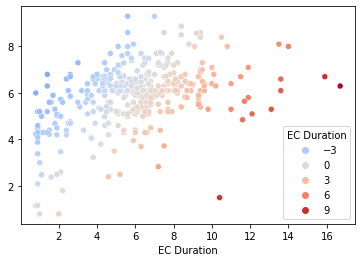

In [241]:
regr_trans = TransformedTargetRegressor(
    #regressor=TweedieRegressor(link='log', power=2),
    regressor=RidgeCV(),
    #transformer=pass_transformer
    #transformer=MinMaxScaler()
    #transformer=PowerTransformer(method="box-cox")
    transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

Cross-validation scores: [1.82869605 1.89121905 1.96873379 1.44525813 1.6618387  1.59153639
 2.00551634 2.24695759 2.82190863 1.42754881]
Average cross-validation score: 1.8889213488604315


<AxesSubplot:xlabel='EC Duration'>

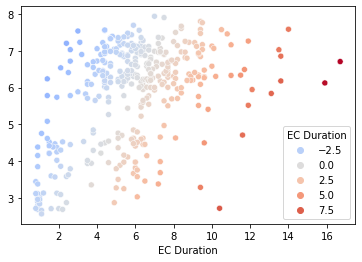

In [242]:
from sklearn.ensemble import RandomForestRegressor
regr_trans = TransformedTargetRegressor(
    #regressor=TweedieRegressor(link='log', power=2),
    regressor=RandomForestRegressor(min_samples_leaf=10, max_features=50),
    #transformer=pass_transformer
    #transformer=MinMaxScaler()
    transformer=PowerTransformer()
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

<AxesSubplot:xlabel='EC Duration', ylabel='Density'>

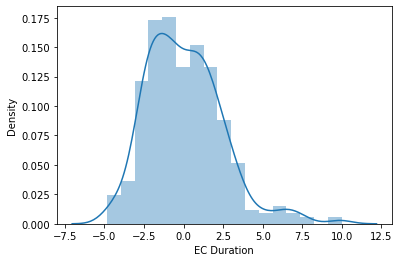

In [243]:
sns.distplot(y-y_pred)

In [244]:
regressor=RandomForestRegressor(min_samples_leaf=10, max_features=50)
regressor.fit(X, y)
regressor.feature_importances_

array([0.00603343, 0.01339382, 0.03006056, 0.47043301, 0.11596679,
       0.07716097, 0.05542394, 0.00971324, 0.00540227, 0.        ,
       0.        , 0.        , 0.01554896, 0.005563  , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00164525, 0.        , 0.        , 0.00072719, 0.        ,
       0.01627556, 0.00439894, 0.02807689, 0.        , 0.03421005,
       0.02304761, 0.        , 0.        , 0.        , 0.00974695,
       0.00105563, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00063566, 0.        , 0.00467481, 0.        ,
       0.00529102, 0.        , 0.00091543, 0.        , 0.00778352,
       0.00493041, 0.        , 0.00091031, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00063926, 0.        ,
       0.00304645, 0.        , 0.        , 0.        , 0.     

<AxesSubplot:>

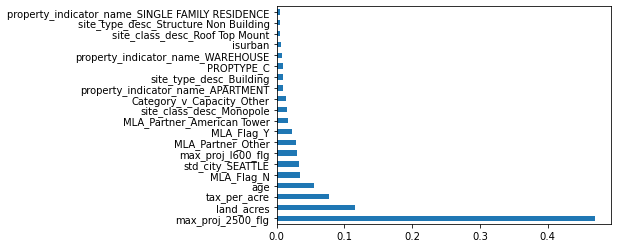

In [245]:
feature_imp = pd.Series(regressor.feature_importances_, index = X.columns)
feature_imp.nlargest(20).plot(kind = 'barh')

<AxesSubplot:xlabel='EC Duration'>

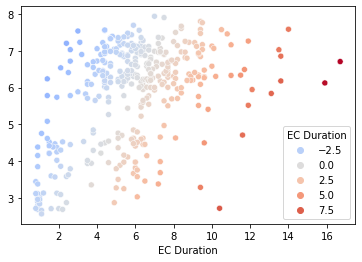

In [246]:
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")